Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import acquire_zillow

In [2]:
df = acquire_zillow.zillow_clustering_acquire()
df.head(3)

,parcelid,transactiondate,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,basementsqft,...,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,property_id,transaction_id
0,10711855,2017-07-07,NaN,NaN,261.0,2.0,NaN,NaN,NaN,NaN,...,-0.007357,None,None,None,Central,Single Family Residential,None,None,1087254,55006
1,10711877,2017-08-29,NaN,NaN,261.0,2.0,NaN,NaN,1.0,NaN,...,0.021066,Central,None,None,Central,Single Family Residential,None,None,1072280,71382
2,10711888,2017-04-04,NaN,NaN,261.0,2.0,NaN,NaN,1.0,NaN,...,0.077174,Central,None,None,Central,Single Family Residential,None,None,1340933,23209


# Log Error Hypotheses

## Setup

In [3]:
df_logerror = df[['parcelid','logerror','fips']].copy()
df_logerror.head(3)

,parcelid,logerror,fips
0,10711855,-0.007357,6037.0
1,10711877,0.021066,6037.0
2,10711888,0.077174,6037.0


In [4]:
df.fips.value_counts()

6037.0    50551
6059.0    20593
6111.0     6237
Name: fips, dtype: int64

In [5]:
map1 = {6037:'LosAngeles', 6059:'Orange', 6111:'Ventura'}
df_logerror['county'] = df_logerror.fips.map(map1)
df_logerror.head(3)

,parcelid,logerror,fips,county
0,10711855,-0.007357,6037.0,LosAngeles
1,10711877,0.021066,6037.0,LosAngeles
2,10711888,0.077174,6037.0,LosAngeles


In [6]:
q1, q3 = df_logerror.logerror.quantile([.25, .75])
# df_logerror[(df_logerror.logerror > q1) & (df_logerror.logerror < q3)]

<AxesSubplot:xlabel='county', ylabel='logerror'>

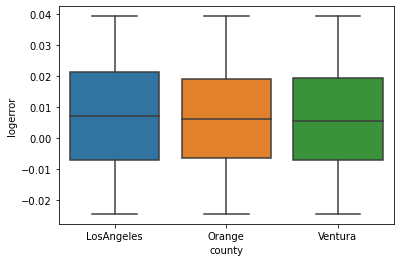

In [7]:
sns.boxplot(data=df_logerror[(df_logerror.logerror > q1) & (df_logerror.logerror < q3)], x='county', y='logerror')

In [8]:
LA = df_logerror[df_logerror.county == 'LosAngeles']
Orange = df_logerror[df_logerror.county == 'Orange']
Ventura = df_logerror[df_logerror.county == 'Ventura']

## Los Angeles County differs?
$H_0$: Los Angeles county logerror does not differ significantly from the total population.

$H_a$: Los Angeles county logerror differs significantly from the total population.

In [9]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(LA.logerror, df_logerror.logerror)

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('Results do not pass 95% confidence threshold.')

We reject the null hypothesis with 95% confidence.


## Orange County differs?
$H_0$: Orange county logerror does not differ significantly from the total population.

$H_a$: Orange county logerror differs significantly from the total population.

In [10]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(Orange.logerror, df_logerror.logerror)

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('Results do not pass 95% confidence threshold.')

We reject the null hypothesis with 95% confidence.


## Ventura County differs?
$H_0$: Ventura county logerror does not differ significantly from the total population.

$H_a$: Ventura county logerror differs significantly from the total population.

In [11]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(Ventura.logerror, df_logerror.logerror)

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('Results do not pass 95% confidence threshold.')

We reject the null hypothesis with 95% confidence.


# Heating System and Home Value

## Setup

In [12]:
df.heatingorsystemdesc.isna().sum() / len(df)

0.36108347010247993

In [13]:
df_heat = df[['propertylandusedesc','parcelid','taxvaluedollarcnt','heatingorsystemdesc']].copy()
df_heat.head(3)

,propertylandusedesc,parcelid,taxvaluedollarcnt,heatingorsystemdesc
0,Single Family Residential,10711855,624139.0,Central
1,Single Family Residential,10711877,660000.0,Central
2,Single Family Residential,10711888,542923.0,Central


In [14]:
df_heat.isna().sum()

propertylandusedesc        0
parcelid                   0
taxvaluedollarcnt          1
heatingorsystemdesc    27941
dtype: int64

In [15]:
df_heat_single = df_heat[df_heat.propertylandusedesc == 'Single Family Residential']

In [16]:
for value in df_heat_single.heatingorsystemdesc.unique():
    print(value, (df_heat_single.heatingorsystemdesc == value).mean())

Central 0.39543195718654434
Floor/Wall 0.2394304281345566
None 0.0
Solar 0.001624617737003058
Gravity 3.82262996941896e-05
Forced air 0.009881498470948012
Baseboard 0.0001337920489296636
Yes 1.91131498470948e-05
None 0.0003058103975535168
Radiant 0.00011467889908256881


In [17]:
print(df_heat_single.heatingorsystemdesc.value_counts())
df_heat_single.dropna(inplace=True)
print(df_heat_single.heatingorsystemdesc.value_counts())

Central       20689
Floor/Wall    12527
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64
Central       20689
Floor/Wall    12527
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64


/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
central_heating = df_heat_single.heatingorsystemdesc == 'Central'
wallfloor_heating = df_heat_single.heatingorsystemdesc == 'Floor/Wall'
forcedair_heating = df_heat_single.heatingorsystemdesc == 'Forced air'
solar_heating = df_heat_single.heatingorsystemdesc == 'Solar'

In [19]:
df_big_heats = df_heat_single[central_heating | wallfloor_heating | forcedair_heating | solar_heating]
df_big_heats.heatingorsystemdesc.value_counts()

Central       20689
Floor/Wall    12527
Forced air      517
Solar            85
Name: heatingorsystemdesc, dtype: int64

<AxesSubplot:xlabel='heatingorsystemdesc', ylabel='taxvaluedollarcnt'>

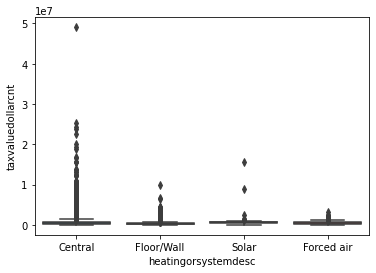

In [20]:
sns.boxplot(data=df_big_heats, x='heatingorsystemdesc', y='taxvaluedollarcnt')

<AxesSubplot:xlabel='heatingorsystemdesc', ylabel='taxvaluedollarcnt'>

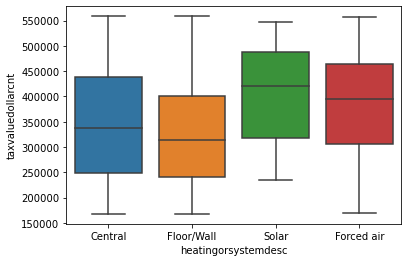

In [21]:
q1, q3 = df_big_heats.taxvaluedollarcnt.quantile([.25, .75])
sns.boxplot(data=df_big_heats[(df_big_heats.taxvaluedollarcnt > q1) & 
                              (df_big_heats.taxvaluedollarcnt < q3)], 
            x='heatingorsystemdesc', 
            y='taxvaluedollarcnt')

In [22]:
Central = df_big_heats[df_big_heats.heatingorsystemdesc == 'Central']
FloorWall = df_big_heats[df_big_heats.heatingorsystemdesc == 'Floor/Wall']
Solar = df_big_heats[df_big_heats.heatingorsystemdesc == 'Solar']
ForcedAir = df_big_heats[df_big_heats.heatingorsystemdesc == 'Forced air']

## Solar-heated homes are more valuable than all homes?
$H_0$: Homes with solar heating are not statistically higher value than all homes.

$H_a$: Homes with solar heating are statistically higher value than all homes.

In [23]:
alpha = .05
t, p = stats.mannwhitneyu(Solar.taxvaluedollarcnt, df_big_heats.taxvaluedollarcnt)

if p < alpha and t > 0:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('Results do not pass 95% confidence threshold.')

We reject the null hypothesis with 95% confidence.


## Central heating is more valuable than Floor/Wall heating?

In [24]:
alpha = .05
t, p = stats.mannwhitneyu(Central.taxvaluedollarcnt, FloorWall.taxvaluedollarcnt)

if p < alpha and t > 0:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('Results do not pass 95% confidence threshold.')

We reject the null hypothesis with 95% confidence.


In [25]:
t,p

(90009418.5, 0.0)

## Floor/Wall heating is more valuable than Forced Air heating?

In [26]:
alpha = .05
t, p = stats.mannwhitneyu(FloorWall.taxvaluedollarcnt, ForcedAir.taxvaluedollarcnt)

if p < alpha and t > 0:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('Results do not pass 95% confidence threshold.')

We reject the null hypothesis with 95% confidence.


In [27]:
t,p

(1662848.0, 6.02070671230912e-79)